# Importing the dependencies

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import re

# Loading both the version 1 csv files of flats and independnet houses
flats_df = pd.read_csv('Cleaned_Flats_V1.csv')
Ih_df = pd.read_csv('Cleaned_IH_V1.csv')

### Loading and concatinating the dataframes

In [3]:
# Reseting the index
flats_df.reset_index(drop=True,inplace=True)
Ih_df.reset_index(drop=True,inplace=True)

# Concatinating both the dataframes
df = pd.concat([flats_df,Ih_df],ignore_index=True)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Exploratory data analysis

In [5]:
# Checking shape of the dataframe
df.shape

(3961, 20)

In [6]:
# Checking features information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    3961 non-null   object 
 1   Property_Type    3961 non-null   object 
 2   society          3960 non-null   object 
 3   price            3961 non-null   float64
 4   Price_Per_SQFT   3961 non-null   float64
 5   Area             3961 non-null   float64
 6   areaWithType     3961 non-null   object 
 7   bedRoom          3961 non-null   float64
 8   bathroom         3961 non-null   float64
 9   balcony          3961 non-null   object 
 10  additionalRoom   3961 non-null   object 
 11  address          3950 non-null   object 
 12  floorNum         3961 non-null   int64  
 13  facing           2784 non-null   object 
 14  agePossession    3960 non-null   object 
 15  nearbyLocations  3754 non-null   object 
 16  description      3961 non-null   object 
 17  furnishDetails

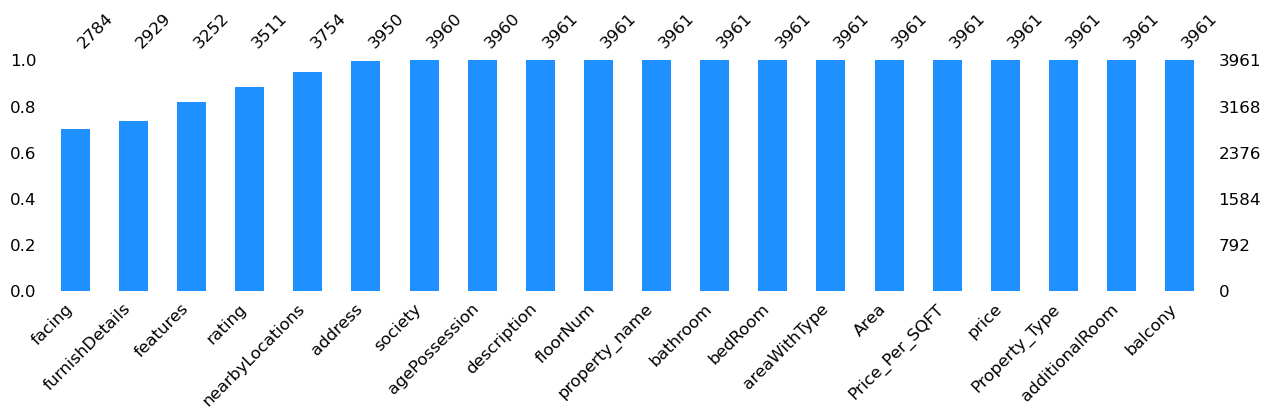

In [7]:
# Checking any null values
msno.bar(df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

In [8]:
if df.duplicated().sum() == 0:
    print("No duplicate values")
else:
    print("Removed duplicates")
    df.drop_duplicates(inplace=True)

No duplicate values


In [9]:
df.head(3)

,property_name,Property_Type,society,price,Price_Per_SQFT,Area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,45.0,5000.0,90000.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,not available,"Krishna Colony, Gurgaon, Haryana",4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,50.0,7692.0,65003.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,40.0,6722.0,59506.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,not available,"Sohna, Gurgaon, Haryana",12,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."


In [10]:
# Extracting secotor number from the property namea and create a new feature with name sector
df.insert(loc=3,column='sector',value=df['property_name'].str.split('in').str.get(1).str.replace('Gurgaon','').str.strip())

# Lowercasing the values
df['sector'] = df['sector'].str.lower()

In [11]:
value_counts = df['sector'].value_counts()[df['sector'].value_counts() >= 3]
df = df[df['sector'].isin(value_counts.index)]

In [12]:
df['sector'] = df['sector'].str.replace('sector 95a','sector 95')
df['sector'] = df['sector'].str.replace('sector 23a','sector 23')
df['sector'] = df['sector'].str.replace('sector 12a','sector 12')
df['sector'] = df['sector'].str.replace('sector 3a','sector 3')
df['sector'] = df['sector'].str.replace('sector 110 a','sector 110')
df['sector'] = df['sector'].str.replace('patel nagar','sector 15')
df['sector'] = df['sector'].str.replace('a block sector 43','sector 43')
df['sector'] = df['sector'].str.replace('maruti kunj','sector 12')
df['sector'] = df['sector'].str.replace('b block sector 43','sector 43')

df['sector'] = df['sector'].str.replace('sector-33 sohna road','sector 33')
df['sector'] = df['sector'].str.replace('sector 1 manesar','manesar')
df['sector'] = df['sector'].str.replace('sector 4 phase 2','sector 4')
df['sector'] = df['sector'].str.replace('sector 1a manesar','manesar')
df['sector'] = df['sector'].str.replace('c block sector 43','sector 43')
df['sector'] = df['sector'].str.replace('sector 89 a','sector 89')
df['sector'] = df['sector'].str.replace('sector 2 extension','sector 2')
df['sector'] = df['sector'].str.replace('sector 36 sohna road','sector 36')

df['sector'] = df['sector'].str.replace('sector 37d','sector 37')
df['sector'] = df['sector'].str.replace('sector 70a','sector 70')
df['sector'] = df['sector'].str.replace('sector 37c','sector 33')
df['sector'] = df['sector'].str.replace('sector-33 sohna','sector 33')
df['sector'] = df['sector'].str.replace('sector 99a','sector 99')
df['sector'] = df['sector'].str.replace('sector 88a','sector 88')
df['sector'] = df['sector'].str.replace('sector 67a','sector 67')
df['sector'] = df['sector'].str.replace('sector 82a','sector 82')

df['sector'] = df['sector'].str.replace('sector 63a','sector 63')
df['sector'] = df['sector'].str.replace('sector 36a','sector 36')
df['sector'] = df['sector'].str.replace('sector 9a','sector 9')
df['sector'] = df['sector'].str.replace('sector 10a','sector 10')
df['sector'] = df['sector'].str.replace('sector 17b','sector 17')
df['sector'] = df['sector'].str.replace('sector 17a','sector 17')
df['sector'] = df['sector'].str.replace('sector 88b','sector 88')
df['sector'] = df['sector'].str.replace('sector-2 sohna','sector 2')

df['sector'] = df['sector'].str.replace('sector 37a','sector 37')
df['sector'] = df['sector'].str.replace('near sector 1 market','sector 1')
df['sector'] = df['sector'].str.replace('sector-35 sohna','sector 35')
df['sector'] = df['sector'].str.replace('new colony, sector 7','sector 7')
df['sector'] = df['sector'].str.replace('civil l','sector 1')
df['sector'] = df['sector'].str.replace('block g sector-57','sector 57')
df['sector'] = df['sector'].str.replace('anand garden, sector-105','sector 105')
df['sector'] = df['sector'].str.replace('sector 9b','sector 9b')

After fixing the sector values having a,b,c now we need to find the actual sectors of the places and replace them with their sector number.

In [13]:
df['sector'] = df['sector'].str.replace('mg road','sector 25')
df['sector'] = df['sector'].str.replace('a block sushant lok phase 1','sector 26')
df['sector'] = df['sector'].str.replace('prem nagar','sector 13')
df['sector'] = df['sector'].str.replace('b block sushant lok phase 1','sector 40')
df['sector'] = df['sector'].str.replace('gandhi nagar','sector 11')
df['sector'] = df['sector'].str.replace('laxmi garden','sector 11')
df['sector'] = df['sector'].str.replace('shakti nagar','sector 11')
df['sector'] = df['sector'].str.replace('vishnu garden','sector 105')

df['sector'] = df['sector'].str.replace('sohna','sector 1')
df['sector'] = df['sector'].str.replace('nirvana country','sector 50')
df['sector'] = df['sector'].str.replace('dlf phase 2','sector 25')
df['sector'] = df['sector'].str.replace('dlf phase 1','sector 25')
df['sector'] = df['sector'].str.replace('dlf phase 3','sector 24')
df['sector'] = df['sector'].str.replace('dlf phase 4','sector 24')
df['sector'] = df['sector'].str.replace('dlf phase 5','sector 53')
df['sector'] = df['sector'].str.replace('palam vihar','sector 1')
df['sector'] = df['sector'].str.replace('laxman vihar','sector 3')
df['sector'] = df['sector'].str.replace('sushant lok phase 1','sector 43')
df['sector'] = df['sector'].str.replace('vishnu garden','sector 105')

df['sector'] = df['sector'].str.replace('sector 3 phase 2','sector 3')
df['sector'] = df['sector'].str.replace('sector 1 road','sector 1')
df['sector'] = df['sector'].str.replace('south city 1','sector 1')
df['sector'] = df['sector'].str.replace('c block sector 43','sector 43')
df['sector'] = df['sector'].str.replace('sector 36 sector 1','sector 36')
df['sector'] = df['sector'].str.replace('sector 1 imt manesar','sector 1')
df['sector'] = df['sector'].str.replace('sector 1a imt manesar','sector 1')
df['sector'] = df['sector'].str.replace('new sector 1','sector 1')
df['sector'] = df['sector'].str.replace('new','sector 1')

df['sector'] = df['sector'].str.replace('imt manesar','sector 1')
df['sector'] = df['sector'].str.replace('suncity','sector 54')
df['sector'] = df['sector'].str.replace('surya vihar','sector 21')
df['sector'] = df['sector'].str.replace('adarsh nagar','sector 12')
df['sector'] = df['sector'].str.replace('valley view estate','sector 58')
df['sector'] = df['sector'].str.replace('bhondsi','sector 68')
df['sector'] = df['sector'].str.replace('dharam colony','sector 12')
df['sector'] = df['sector'].str.replace('shivaji nagar','sector 11')
df['sector'] = df['sector'].str.replace('madanpuri','sector 7')

df['sector'] = df['sector'].str.replace('shivpuri','sector 7')
df['sector'] = df['sector'].str.replace('devilal colony','sector 9')
df['sector'] = df['sector'].str.replace('bhim nagar','sector 6')
df['sector'] = df['sector'].str.replace('ravi nagar','sector 9')
df['sector'] = df['sector'].str.replace('krishna colony','sector 7')
df['sector'] = df['sector'].str.replace('baldev nagar','sector 7')
df['sector'] = df['sector'].str.replace('dharam colony','sector 12')
df['sector'] = df['sector'].str.replace('garhi harsaru','sector 93')
df['sector'] = df['sector'].str.replace('manesar','sector 1')

df['sector'] = df['sector'].str.replace('subhash nagar','sector 6')
df['sector'] = df['sector'].str.replace('dayanand colony','sector 6')
df['sector'] = df['sector'].str.replace('greenwood city','sector 45')
df['sector'] = df['sector'].str.replace('chakkarpur','sector 18')
df['sector'] = df['sector'].str.replace('sushant lok phase 2','sector 55')
df['sector'] = df['sector'].str.replace('saraswati vihar','sector 28')
df['sector'] = df['sector'].str.replace('ansal plaza','sector 1')
df['sector'] = df['sector'].str.replace('arjun nagar','sector 8')
df['sector'] = df['sector'].str.replace('rajiv nagar','sector 13')

df['sector'] = df['sector'].str.replace('jacobpura','sector 12')
df['sector'] = df['sector'].str.replace('jyoti park','sector 7')
df['sector'] = df['sector'].str.replace('ashok vihar','sector 3')
df['sector'] = df['sector'].str.replace('sector 1 colony','sector 1')
df['sector'] = df['sector'].str.replace('surat nagar 1','sector 104')
df['sector'] = df['sector'].str.replace('mianwali colony','sector 12')
df['sector'] = df['sector'].str.replace('dwarka expressway','sector 99')
df['sector'] = df['sector'].str.replace('malibu town','sector 47')
df['sector'] = df['sector'].str.replace('mehrauli  road','sector 28')

df['sector'] = df['sector'].str.replace('sector 1 extension','sector 1')
df['sector'] = df['sector'].str.replace('sector 3 phase 2','sector 3')
df['sector'] = df['sector'].str.replace('sector 3 phase 3 extension','sector 3')
df['sector'] = df['sector'].str.replace('uppals southend','sector 49')
df['sector'] = df['sector'].str.replace('rajendra park','sector 105')
df['sector'] = df['sector'].str.replace('sushant lok phase 3','sector 57')
df['sector'] = df['sector'].str.replace('gwal pahari','sector 55')

For the `areaWithType` feature if we will carefully observe then we will realize that there are 4 different types of areas mentioned in this this feature and these 4 types are ( Plot area, Carpet area, Built up area and Super built up area ).

Also in the `Area` feature in some rows we are given carpet area but in some other rows we are given some other type of area, thus this feature is not very much reliable and instead of focusing on the `Area` feature we will be utilizing the `areaWithType` feature and extract all 4 areas from it and create 4 new features.

In [20]:
df[['Area','areaWithType']].head(5)

,Area,areaWithType
0,90000.0,Carpet area: 900 (83.61 sq.m.)
1,65003.0,Carpet area: 650 (60.39 sq.m.)
2,59506.0,Carpet area: 595 (55.28 sq.m.)
3,0.0,Carpet area: 1200 (111.48 sq.m.)
4,134512.0,Super Built up area 1345(124.95 sq.m.)


In [53]:
class Extract_featres_Area:
    """
    This class will be used to extract new features from existing areaWithTYpe feature and
    it will also help us to convert sq.m to sq.ft
    """

    # This function extracts the Super Built up area
    def get_super_built_up_area(self,text):
        match = re.search(r'Super Built up area (\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
        return None

    # This function extracts the Built Up area or Carpet area
    def get_area(self,text, area_type):
        match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
        return None
    
    # Function to extract plot area from 'areaWithType' column
    def extract_plot_area(self,area_with_type):
        match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
        if match:
            return float(match.group(1))
        else:
            None

    # This function checks if the area is provided in sq.m. and converts it to sqft if needed
    def convert_to_sqft(self,text, area_value):
        if area_value is None:
            return None
        match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
        if match:
            sq_m_value = float(match.group(1))
            return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
        return area_value
    
    
    # This method will convert the built_up_area of indpendent houses to sqft
    def convert_scale(self,row):
        if np.isnan(row['Area']) or np.isnan(row['built_up_area']):
            return row['built_up_area']
        else:
            if round(row['Area']/row['built_up_area']) == 9.0:
                return row['built_up_area'] * 9
            elif round(row['Area']/row['built_up_area']) == 11.0:
                return row['built_up_area'] * 10.7
            else:
                return row['built_up_area']

In [40]:
df[['Property_Type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(10)

,Property_Type,Area,areaWithType,super_built_up_area,built_up_area,carpet_area
1821,flat,0.0,Super Built up area 1935(179.77 sq.m.)Carpet a...,1935.0,NaN,1600.00
3836,Independent_House,0.0,Plot area 204(170.57 sq.m.)Built Up area: 200 ...,NaN,200.0,180.00
2011,flat,0.0,Super Built up area 1457(135.36 sq.m.),1457.0,NaN,NaN
428,flat,0.0,Carpet area: 3980 (369.75 sq.m.),NaN,NaN,3980.00
2013,flat,68101.0,Built Up area: 681 (63.27 sq.m.)Carpet area: 5...,NaN,681.0,581.00
3957,Independent_House,0.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
1966,flat,0.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,1650.0,NaN,1022.58
1889,flat,0.0,Super Built up area 1573(146.14 sq.m.)Built Up...,1573.0,1350.0,1150.00
3317,Independent_House,0.0,Plot area 348(290.97 sq.m.),NaN,NaN,NaN
289,flat,0.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,2000.0,NaN,1294.00


With a carefully analysis we will see that the rows where the `Property_Type` is Independent_House have missing values from all the newly created features and the reason is that Independent houses do not have any carpet area, builtup area or super built up area, instead they have a plot area. So we need to extract the plot area from the `areaWithType` feature and convert it to sqft. So let's include another method in the above class for extracting the plot area and creating new feature.

In [ ]:
# Instantiating the class
clean_area = Extract_featres_Area()

# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(clean_area.get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: clean_area.convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: clean_area.get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: clean_area.convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: clean_area.get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: clean_area.convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [51]:
Ind_House_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','Property_Type','Area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

# Extracting Plot area ( Plot area of houses ~ Built up area of flats )
Ind_House_df['built_up_area'] = Ind_House_df['areaWithType'].apply(clean_area.extract_plot_area)

# Convertions of values to sqft
Ind_House_df['built_up_area'] = Ind_House_df.apply(clean_area.convert_scale,axis=1)

# Updating the original dataframe
df.update(Ind_House_df)